In [91]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pickle

In [92]:
with open('test_set.pkl', 'rb') as f:
        X_test= pickle.load(f)  
with open('train_set.pkl', 'rb') as f:
        X_train= pickle.load(f)  
with open('ytest.pkl', 'rb') as f:
        y_test= pickle.load(f)  
with open('ytrain.pkl', 'rb') as f:
        y_train= pickle.load(f)  
for i in [X_train,X_test]:
    #i.pop("spotify_explicit")
    #i.pop("spotify_mode")
   #i.pop("num_artists")
    i.pop("artist_has_award")
    #i.pop("album_type")
    #i.pop("gold_count")
    #i.pop("spotify_time_signature")
    #i.pop("datetime_month")
    #i.pop("award_num")
    #i.pop("label_category_group")
    #i.pop("datetime_year")
    #i.pop("firstrank")
    #i.pop("num_songs_awards")
    #i.pop("platinum_count")

In [93]:
"""X_train["top10"] = y_train
X_train = X_train.sample(frac=1)
top_df = X_train.loc[X_train['top10'] == 1]
non_top_df = X_train.loc[X_train['top10'] == 0][:600]
X_train = pd.concat([top_df, non_top_df])
y_train = X_train.pop("top10")"""
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)


/Users/iliasmiraoui/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [95]:
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = dataset.shuffle(len(X_train)).batch(32)

def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

model = get_compiled_model()
model.fit(train_dataset, epochs=15)
model.save("neuralnet1.h5")

W1208 15:43:41.477916 4548394304 base_layer.py:1814] Layer sequential_20 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/15
364/364 [==============================] - 7s 20ms/step - loss: 310.5646 - accuracy: 0.5036
Epoch 2/15
364/364 [==============================] - 6s 18ms/step - loss: 0.9135 - accuracy: 0.4950
Epoch 3/15
364/364 [==============================] - 6s 16ms/step - loss: 0.7532 - accuracy: 0.5016
Epoch 4/15
364/364 [==============================] - 6s 16ms/step - loss: 0.7259 - accuracy: 0.5022
Epoch 5/15
364/364 [==============================] - 6s 16ms/step - loss: 0.7218 - accuracy: 0.4962
Epoch 6/15
364/364 [==============================] - 6s 16ms/step - loss: 0.7102 - accuracy: 0.4901
Epoch 7/15
364/364 [==============================] - 6s 17ms/step - loss: 0.7009 - accuracy: 0.4940
Epoch 8/15
364/364 [==============================] - 6s 15ms/step - loss: 0.6966 - accuracy: 0.4958
Epoch 9/15
364/364 [==============================] - 6s 16ms/step - loss: 0.6957 - accuracy: 0.5050
Epoch 10/15
364/364 [==============================] - 6s 15ms/step - loss: 0.7106 - accu

In [97]:
predictions = model(X_test.values)
from sklearn.metrics import confusion_matrix
predictions_matrix = [1 if pred > 0.5 else 0 for pred in predictions]
confusion_matrix(y_test,predictions_matrix)

array([[1572,    0],
       [  67,    0]])

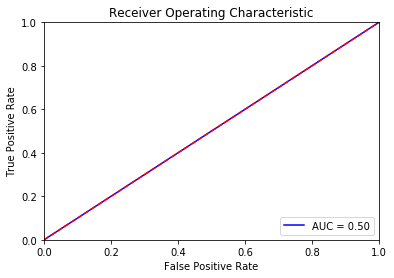

In [98]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()